# DATA ANALYSIS -SPARKS
##### Abhishek A Nigam

## Importing Files and required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('data/matches.csv')
deliveries = pd.read_csv('data/deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## Removing dupliactes and null

In [7]:
matches.duplicated().sum ()

0

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [19]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
deliveries.duplicated().sum()

23

In [16]:
deliveries.drop_duplicates(subset=None,keep='first',inplace=True)

In [18]:
deliveries.shape

(179055, 21)

In [20]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

## Number of Matches Played in Particular Season

<AxesSubplot:xlabel='season', ylabel='count'>

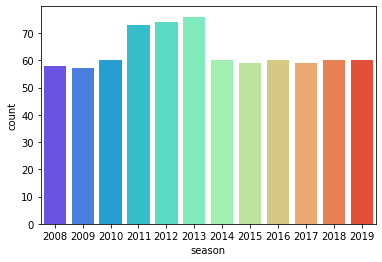

In [28]:
sns.countplot(data=matches,x='season',palette="rainbow")

## Matches Won By Teams After Winning The Toss

<AxesSubplot:xlabel='count', ylabel='winner'>

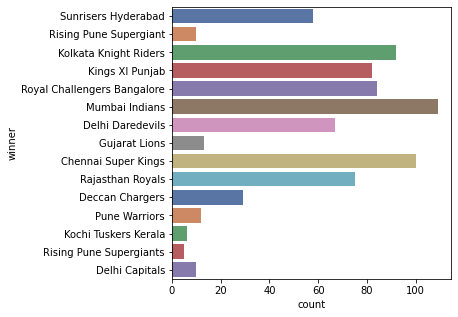

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(data=matches,y='winner',palette="deep")

<AxesSubplot:xlabel='count', ylabel='winner'>

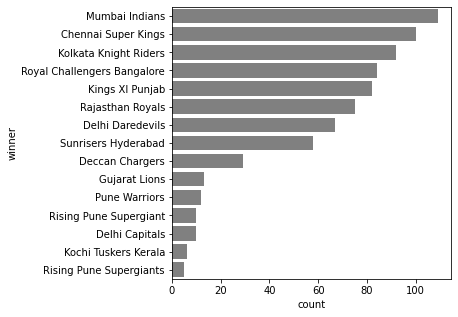

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(data=matches,y='winner',order = matches['winner'].value_counts().index,color="grey")

In [41]:
matches['won_toss']=matches['winner']==matches['toss_winner']

<AxesSubplot:xlabel='count', ylabel='winner'>

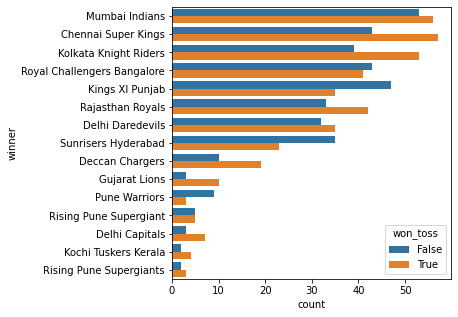

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(data=matches,y='winner',order = matches['winner'].value_counts().index,hue='won_toss')

<AxesSubplot:xlabel='count', ylabel='player_of_match'>

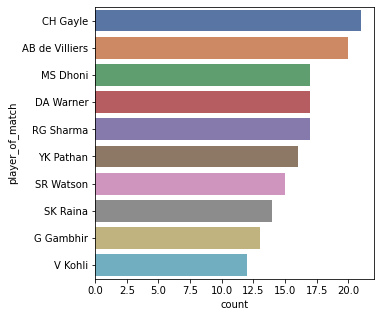

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(y=matches['player_of_match'],order = matches['player_of_match'].value_counts().index[:10],palette="deep")

## Top Run_Scorers

In [45]:
batsman_stats = deliveries.groupby('batsman')[['batsman_runs']].sum().sort_values('batsman_runs',ascending=False)
batsman_stats.head(5)

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4631


<AxesSubplot:xlabel='batsman_runs', ylabel='batsman'>

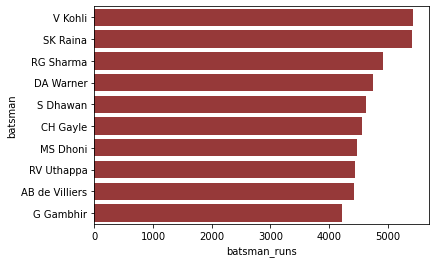

In [47]:
sns.barplot(x=batsman_stats['batsman_runs'][:10],y=batsman_stats.index[:10],color="brown")

## Types Of Dismissals

In [48]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

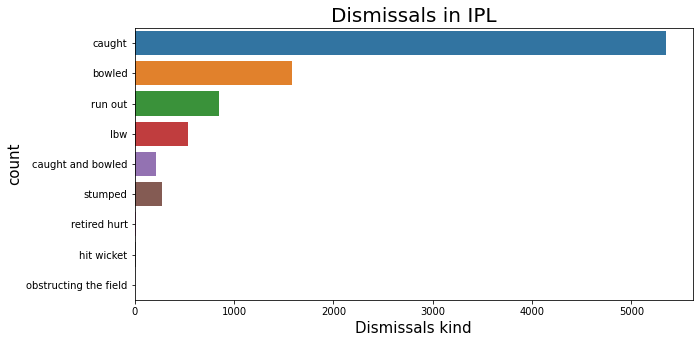

In [49]:
plt.figure(figsize=(10,5))
ax=sns.countplot(y = deliveries['dismissal_kind'])
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()


## Catches Win Matches

In [50]:
catches = deliveries[(deliveries['dismissal_kind']=='caught') | (deliveries['dismissal_kind']=='caught and bowled') ]
catches=catches.groupby('fielder').count().sort_values(by='total_runs',ascending= False)['total_runs']
catches.head(10)

fielder
KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: total_runs, dtype: int64

<AxesSubplot:xlabel='total_runs', ylabel='fielder'>

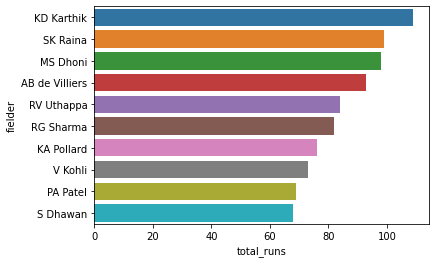

In [51]:
sns.barplot(x=catches[:10],y=catches.index[:10])


## Wickets

In [52]:
wickets = deliveries[(deliveries['dismissal_kind']=='bowled') | (deliveries['dismissal_kind']=='lbw') ]
wickets=wickets.groupby('bowler').count().sort_values(by='dismissal_kind',ascending= False)['dismissal_kind']
wickets.head(10)

bowler
SL Malinga         74
PP Chawla          59
SP Narine          51
B Kumar            43
RA Jadeja          38
A Mishra           38
Harbhajan Singh    37
R Ashwin           36
DW Steyn           32
Z Khan             31
Name: dismissal_kind, dtype: int64

<AxesSubplot:xlabel='dismissal_kind', ylabel='bowler'>

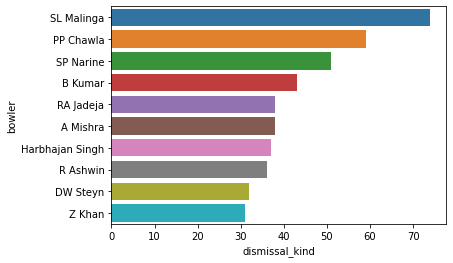

In [53]:
sns.barplot(x=wickets[:10],y=wickets.index[:10])

## Run Outs

In [54]:
run_outs = deliveries[deliveries['dismissal_kind']=='run out']
run_outs=run_outs.groupby('fielder').count().sort_values(by='total_runs',ascending= False)['total_runs']
run_outs.head(10)

fielder
MS Dhoni          23
RA Jadeja         20
V Kohli           17
SK Raina          16
AB de Villiers    14
KD Karthik        14
MK Pandey         14
PA Patel          12
DJ Bravo          12
AT Rayudu         10
Name: total_runs, dtype: int64

<AxesSubplot:xlabel='total_runs', ylabel='fielder'>

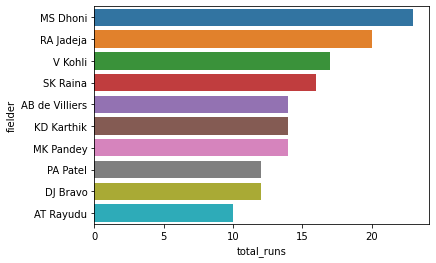

In [55]:
sns.barplot(x=run_outs[:10],y=run_outs.index[:10])


Conclusions:-
1) Season:

    2011,2012,2013 had more number of matches than the other seaons

2) Winning Team:

    Mumbai Indians              (1st) 
    Chennai Super Kings         (2nd)
    Kolkata Knight Riders       (3rd)
    Royal Challengers Bangalore (4th)
    Kings XI Punjab             (5th)

3) Highest Man of Match : Chris Gayle

4) Highest Runs:

    V Kohli     (1st) 
    SK Raina    (2nd)
    RG Sharma   (3rd)
    DA Warner   (4th)
    S Dhawan    (5th)

5) Dismissal Kind:

Highest dismissal are of Caught type

Caught:

   KD Karthik         (1st) 
   SK Raina           (2nd)
   MS Dhoni           (3rd)
   AB de Villiers     (4th)
   RV Uthappa         (5th)

Wickets:

   SL Malinga         (1st) 
   PP Chawla          (2nd)
   SP Narine          (3rd)
   B Kumar            (4th)
   RA Jadeja          (5th)

Run-Out:

   MS Dhoni           (1st) 
   RA Jadeja          (2nd)
   V Kohli            (3rd)
   SK Raina           (4th)
   AB de Villiers     (5th)